In [108]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import seaborn as sns
import matplotlib.pyplot as plt
import os

from statannot import add_stat_annotation
from scipy.stats import iqr
%matplotlib inline

In [2]:
os.getcwd()

'C:\\R-3.6.3'

### Correlation coefficient

In [3]:
base_dir = 'C:\\R-3.6.3'
excel_file = 'base_crc.xls'
excel_dir = os.path.join(base_dir, excel_file)

cb=pd.read_excel('base_crc.xls', header = None)
cb.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,1.000000,0.539712,0.306857,0.271779,0.386691,0.512920,0.305260,0.508155,0.149666,0.265453,...,0.017317,-0.005648,0.404912,0.211323,0.390644,0.333756,0.272250,0.292198,0.456975,0.859491
1,0.539712,1.000000,0.369058,0.642002,0.878812,0.536597,0.593352,0.810839,0.433029,0.295986,...,0.250080,0.416403,0.789583,0.506890,0.555065,0.807980,0.669118,0.468658,0.940318,0.532819
2,0.306857,0.369058,1.000000,0.540124,0.447250,0.712978,0.741948,0.385967,0.574780,0.399476,...,0.118079,0.239269,0.379277,0.448188,0.514058,0.342855,0.435611,0.705858,0.308849,0.221260
3,0.271779,0.642002,0.540124,1.000000,0.783059,0.435816,0.662779,0.534998,0.518774,0.294168,...,0.113509,0.368387,0.480647,0.481817,0.417352,0.675046,0.815316,0.539853,0.572503,0.197544
4,0.386691,0.878812,0.447250,0.783059,1.000000,0.528196,0.615911,0.661000,0.462026,0.271086,...,0.204288,0.403422,0.634321,0.532999,0.580624,0.867005,0.754059,0.502040,0.790982,0.345825


In [4]:
c1=pd.read_excel('1year_crc.xls', header = None)
c1.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,1.000000,0.611921,0.294241,0.320380,0.439070,0.521300,0.336227,0.549525,0.186218,0.254857,...,0.116571,0.062239,0.427554,0.267705,0.416722,0.358146,0.294827,0.273957,0.504438,0.842423
1,0.611921,1.000000,0.456031,0.703970,0.892257,0.673280,0.648864,0.879873,0.480654,0.358169,...,0.311684,0.456192,0.818918,0.620631,0.674028,0.822482,0.726754,0.527495,0.933895,0.620925
2,0.294241,0.456031,1.000000,0.619918,0.511999,0.712672,0.736970,0.501670,0.607103,0.443981,...,0.117581,0.288858,0.451555,0.454400,0.453229,0.374807,0.438949,0.636882,0.381365,0.223406
3,0.320380,0.703970,0.619918,1.000000,0.814802,0.548588,0.734115,0.678320,0.616233,0.413481,...,0.150279,0.402553,0.591489,0.542894,0.469533,0.684052,0.805422,0.550162,0.621529,0.239408
4,0.439070,0.892257,0.511999,0.814802,1.000000,0.640102,0.699769,0.777488,0.543150,0.355557,...,0.280975,0.480503,0.708938,0.639826,0.675812,0.859409,0.781360,0.535794,0.805878,0.431250


In [5]:
c2=pd.read_excel('2year_crc.xls', header = None)
c2.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,1.000000,0.644645,0.333457,0.319980,0.479563,0.543491,0.356243,0.582218,0.156055,0.202898,...,0.084208,0.049779,0.495902,0.274562,0.424156,0.389223,0.321327,0.317955,0.565477,0.851773
1,0.644645,1.000000,0.410688,0.663260,0.900596,0.655756,0.608535,0.877840,0.392785,0.280784,...,0.241429,0.334406,0.829823,0.538558,0.627937,0.812082,0.691500,0.462624,0.944493,0.576546
2,0.333457,0.410688,1.000000,0.644440,0.486352,0.724412,0.743006,0.439607,0.619110,0.456020,...,0.137220,0.261373,0.440731,0.461147,0.495023,0.408496,0.498504,0.683026,0.374213,0.234318
3,0.319980,0.663260,0.644440,1.000000,0.789084,0.602860,0.725639,0.618226,0.569407,0.384951,...,0.128963,0.331509,0.604099,0.487129,0.477599,0.692569,0.801355,0.530654,0.629866,0.203451
4,0.479563,0.900596,0.486352,0.789084,1.000000,0.667172,0.645943,0.753534,0.432698,0.274465,...,0.208063,0.334767,0.717025,0.542038,0.641975,0.863997,0.757536,0.485719,0.840387,0.407120


### ROI data

In [6]:
yb=pd.read_excel('y_base.xls', header = None)
yb.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.940687,1.043152,0.948859,0.961372,0.972362,1.033010,1.033285,1.055696,1.019223,1.083222,...,1.066735,1.073867,1.052342,1.083282,1.031008,0.969623,0.951355,0.973599,1.030525,0.951941
1,0.945582,1.076068,1.063864,1.089820,1.031460,1.093310,1.090832,1.073810,1.059597,1.123413,...,1.027151,1.030608,1.052224,1.079168,1.089496,1.064728,1.077409,1.008228,1.075569,0.971197
2,0.975771,1.060798,0.949275,1.015583,1.049425,0.996281,1.054733,1.095039,1.065628,1.065500,...,1.058089,1.070296,1.119465,1.050540,1.038854,1.061846,1.000564,0.946300,1.063773,0.996566
3,0.861998,1.040186,1.142825,1.082765,1.016943,1.069252,1.119733,1.096673,1.100890,1.115353,...,1.117484,1.135948,1.071848,1.151971,1.039047,0.972968,1.066161,1.159888,1.024227,0.868109
4,0.847126,1.036831,0.956991,1.142631,1.072392,0.993812,1.067336,1.046514,1.063084,1.023787,...,1.066062,1.089793,1.018724,1.097091,1.076730,1.054937,1.127381,1.073188,1.009547,0.860305


In [7]:
yb.info() # shape : tuple

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 166 entries, 0 to 165
dtypes: float64(166)
memory usage: 181.7 KB


In [8]:
yb.describe()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.919852,1.092447,1.002825,1.045312,1.050381,1.065651,1.082289,1.090795,1.068812,1.106371,...,1.070076,1.064730,1.076781,1.084623,1.065511,1.040747,1.039017,0.991231,1.073760,0.929625
std,0.066850,0.060999,0.082484,0.060779,0.057971,0.058877,0.052178,0.059875,0.045872,0.048314,...,0.048556,0.047160,0.064121,0.055391,0.058192,0.060897,0.062564,0.075446,0.062716,0.066647
min,0.739333,0.956862,0.781412,0.889291,0.913846,0.917903,0.935325,0.925453,0.970019,0.941276,...,0.926210,0.923289,0.855256,0.930731,0.950371,0.906326,0.900142,0.803858,0.942075,0.777169
25%,0.867864,1.048206,0.954409,1.005193,1.010593,1.027936,1.047956,1.049484,1.039769,1.079183,...,1.042119,1.039741,1.040210,1.050034,1.023395,1.001232,1.002790,0.945432,1.028087,0.878743
50%,0.925345,1.093436,0.997650,1.041477,1.039603,1.064149,1.074889,1.094668,1.063895,1.102878,...,1.075401,1.067157,1.068570,1.083432,1.059900,1.037626,1.036847,0.985762,1.069941,0.926519
75%,0.967586,1.135441,1.060696,1.090152,1.087064,1.093572,1.113473,1.124472,1.101283,1.139875,...,1.105441,1.089874,1.114315,1.116692,1.099556,1.078190,1.078328,1.037842,1.117553,0.976058
max,1.114468,1.289483,1.215251,1.199043,1.256901,1.292869,1.250749,1.246100,1.201223,1.250836,...,1.167164,1.197848,1.269918,1.270800,1.367021,1.278236,1.238708,1.226102,1.287774,1.135708


In [9]:
y1=pd.read_excel('y_1year.xls', header = None)
y1.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.906367,1.059269,0.989589,0.997885,0.987448,1.084156,1.064257,1.029333,1.047766,1.116636,...,1.096027,1.104974,1.035624,1.098077,1.047405,1.016846,0.956288,1.007331,1.055225,0.896300
1,0.892159,1.080733,1.055629,1.073830,1.025173,1.065538,1.095337,1.059834,1.071237,1.137690,...,1.042850,1.046162,1.038515,1.084443,1.060072,1.068793,1.057969,0.997008,1.077413,0.922787
2,0.937973,1.078918,0.969811,1.057107,1.083738,0.999604,1.078901,1.082811,1.102869,1.102146,...,1.071600,1.096139,1.108038,1.086849,1.047880,1.094300,1.021267,1.014394,1.084803,0.960560
3,0.838961,1.012241,1.106243,1.043771,0.978500,1.040478,1.081377,1.026765,1.073370,1.107048,...,1.101429,1.095226,1.013200,1.114353,1.010747,0.974159,1.007733,1.095245,1.003814,0.842369
4,0.819423,0.996565,0.940067,1.108173,1.034461,0.978046,1.064465,1.003088,1.074253,1.060513,...,1.063611,1.055265,0.998028,1.033712,1.041595,1.033391,1.104201,1.012379,0.960953,0.786165


In [10]:
y2=pd.read_excel('y_2year.xls', header = None)
y2.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.903053,1.085981,0.978892,0.998352,1.001821,1.061554,1.080558,1.063138,1.052151,1.119438,...,1.099845,1.126464,1.058903,1.122482,1.044085,1.013435,0.963763,1.014240,1.075801,0.903827
1,0.906495,1.116981,1.096400,1.108960,1.065649,1.098683,1.109077,1.079941,1.082601,1.146823,...,1.075134,1.081224,1.071562,1.132229,1.115198,1.128571,1.111167,1.064516,1.126946,0.958630
2,0.958556,1.068974,0.952114,1.032088,1.073294,0.971025,1.031583,1.071922,1.048734,1.031844,...,1.058036,1.092201,1.104072,1.063333,1.048441,1.081654,1.005959,1.019509,1.087444,0.994957
3,0.836775,0.995787,1.128041,1.068563,0.961357,1.045921,1.106812,1.045187,1.094093,1.110553,...,1.094133,1.101152,1.038217,1.141276,1.063933,0.991501,1.074024,1.150976,1.008033,0.849588
4,0.841793,1.032868,0.943739,1.124615,1.071300,1.014653,1.064497,1.008631,1.050162,1.015721,...,1.008034,1.018286,1.004166,1.053296,1.067734,1.033354,1.095741,1.024025,0.989215,0.818509


### random permutation

In [11]:
np.random.permutation(10)

array([1, 2, 4, 9, 8, 5, 0, 7, 3, 6])

In [12]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

<Figure size 1080x576 with 0 Axes>

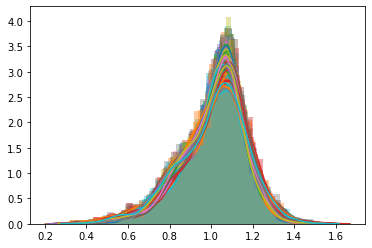

In [48]:
for i in range(100):
    df1 = yb.sample(n=20)
    df2 = y1.sample(n=10)
    sns.distplot(df1)
    sns.distplot(df2)

<AxesSubplot:>

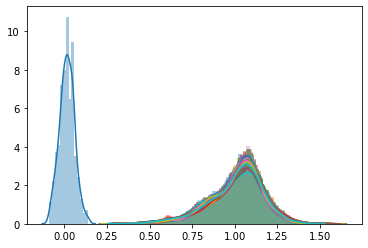

In [69]:
for i in range(100):
    df1 = yb.sample(n=20)
    df2 = y1.sample(n=20)
    sns.distplot(df1)
    sns.distplot(df2)
sns.distplot(df1-df2)

<AxesSubplot:>

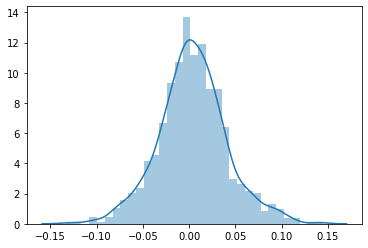

In [55]:
sns.distplot(df1-df2)

<AxesSubplot:>

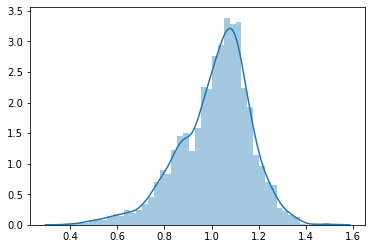

In [56]:
sns.distplot(df1)

<AxesSubplot:>

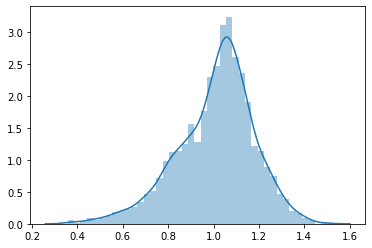

In [57]:
sns.distplot(df2)

In [59]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
82,0.956928,1.079615,1.023897,1.013119,1.025478,1.046051,1.063160,1.044002,1.022710,1.083664,...,1.082380,1.043659,1.058169,1.064797,1.092426,0.988967,1.042249,1.032641,1.062877,0.991529
35,0.913395,1.119264,1.123939,1.066251,1.041448,1.100613,1.178734,1.123978,1.114587,1.132316,...,1.003328,1.051805,1.104316,1.028037,1.093335,1.064840,1.064468,0.969125,1.095968,0.982248
31,0.951249,0.978979,0.904065,0.939870,0.919407,1.007054,1.003281,1.014608,0.989124,1.064404,...,1.049336,0.983926,0.996721,0.959498,1.005522,0.949680,0.944909,0.867931,0.956460,0.921341
19,0.824432,1.013625,0.864525,0.891568,1.018534,0.988746,0.935325,1.025481,0.995412,1.040247,...,0.983742,0.970143,0.962538,0.951079,0.979529,1.010153,0.924300,0.892729,0.979081,0.832729
67,0.901518,1.103613,1.027391,1.003586,1.025185,1.091792,1.129188,1.089848,1.055400,1.116682,...,1.067677,1.057763,1.048781,1.105681,1.079535,0.991612,0.959368,0.960405,1.067110,0.903624


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 54 to 80
Columns: 166 entries, 0 to 165
dtypes: float64(166)
memory usage: 26.7 KB


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 97 to 75
Columns: 166 entries, 0 to 165
dtypes: float64(166)
memory usage: 26.7 KB


In [79]:
df3=df1-df2
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 6 to 132
Columns: 166 entries, 0 to 165
dtypes: float64(166)
memory usage: 49.6 KB


[[1.         0.78249488 0.79087363 0.87809854 0.81662542 0.87057141
  0.85521316 0.90325198 0.8762295  0.79708834 0.9152324  0.83132586
  0.79506105 0.84676775 0.83386787 0.86061694 0.77229235 0.85444501
  0.62084984 0.82573541]
 [0.78249488 1.         0.63049876 0.76700846 0.67937413 0.8943899
  0.73319448 0.83041914 0.69115721 0.74590963 0.83996445 0.71440844
  0.81069145 0.80854397 0.85378887 0.6614308  0.69807982 0.92177402
  0.29912025 0.7780326 ]
 [0.79087363 0.63049876 1.         0.79729628 0.62869989 0.81611601
  0.86151726 0.76503932 0.64007888 0.65251511 0.8354542  0.85841533
  0.711936   0.73449492 0.80170239 0.88336036 0.7158786  0.7437067
  0.43999625 0.6106986 ]
 [0.87809854 0.76700846 0.79729628 1.         0.74373332 0.87160313
  0.82174955 0.82046467 0.79065868 0.71755486 0.89230508 0.81975173
  0.79154984 0.82036553 0.85461786 0.89642472 0.73220291 0.79980148
  0.50284972 0.82995955]
 [0.81662542 0.67937413 0.62869989 0.74373332 1.         0.70669778
  0.7426748  0.796

[[1.         0.8740977  0.70726644 0.63333239 0.73248138 0.74829341
  0.84866397 0.75842342 0.89252625 0.65606794 0.80172367 0.79022243
  0.77292799 0.68745034 0.7379163  0.70451752 0.86751184 0.62081733
  0.79654277 0.56208444]
 [0.8740977  1.         0.6903088  0.67082732 0.85157055 0.75964979
  0.8957929  0.75647395 0.88134778 0.67282569 0.85197952 0.7671274
  0.82523827 0.67802993 0.81150292 0.65210438 0.82486187 0.59878501
  0.78841258 0.55451512]
 [0.70726644 0.6903088  1.         0.83638865 0.7281473  0.81427287
  0.70913376 0.81396288 0.74095006 0.81678053 0.77769917 0.86974991
  0.75410854 0.63481888 0.78208591 0.76307145 0.82566314 0.85264349
  0.82309959 0.85559572]
 [0.63333239 0.67082732 0.83638865 1.         0.80297757 0.87265587
  0.66933208 0.77229235 0.7328067  0.86798168 0.79591713 0.8374696
  0.81873509 0.6514899  0.81732383 0.68724688 0.78894669 0.76164803
  0.82678683 0.72092121]
 [0.73248138 0.85157055 0.7281473  0.80297757 1.         0.8384475
  0.8781413  0.8245

  0.83502599 1.        ]]
[[1.         0.86201516 0.81520033 0.85166457 0.85940174 0.75956105
  0.83586134 0.86781357 0.80588523 0.86291116 0.85580109 0.78109793
  0.77983793 0.77294143 0.87209857 0.86572783 0.80005453 0.61177752
  0.88966207 0.84177511]
 [0.86201516 1.         0.77870423 0.82126551 0.7465165  0.81449717
  0.86989706 0.87224696 0.83951487 0.87975736 0.78391725 0.83454883
  0.8682709  0.73607117 0.88982752 0.82445974 0.6717892  0.7130468
  0.85628263 0.879893  ]
 [0.81520033 0.77870423 1.         0.77395145 0.84301919 0.6957653
  0.79532665 0.79791073 0.7367589  0.89984092 0.85615367 0.81947551
  0.78208591 0.83763213 0.79560999 0.86096249 0.75608382 0.71527731
  0.83796433 0.76701841]
 [0.85166457 0.82126551 0.77395145 1.         0.82376888 0.78775441
  0.88396693 0.82167922 0.84875943 0.79752308 0.7997278  0.86272062
  0.74623336 0.73026175 0.81975173 0.81468994 0.7703519  0.75838924
  0.87221256 0.87818191]
 [0.85940174 0.7465165  0.84301919 0.82376888 1.         0.7

[[1.         0.7083776  0.66531467 0.88272695 0.87172264 0.78824167
  0.67516165 0.74965303 0.84588572 0.81804343 0.79254616 0.80799919
  0.81716428 0.87778235 0.86854634 0.82522668 0.87464349 0.81355411
  0.81569992 0.81410521]
 [0.7083776  1.         0.85806268 0.69043398 0.78592047 0.85185375
  0.77264729 0.7711245  0.58732604 0.65421505 0.72956831 0.75364587
  0.83097273 0.77142461 0.70541381 0.64400143 0.788151   0.77396444
  0.84075013 0.66540282]
 [0.66531467 0.85806268 1.         0.60772764 0.69503958 0.81319637
  0.82840159 0.6945871  0.55401168 0.53220805 0.61400461 0.72500425
  0.7730803  0.66648238 0.65673201 0.59883205 0.7021756  0.67768382
  0.815102   0.57208226]
 [0.88272695 0.69043398 0.60772764 1.         0.77367554 0.70873731
  0.65210438 0.68168731 0.87741528 0.70665628 0.73105379 0.76459756
  0.7671274  0.7891214  0.89508169 0.7430876  0.81150292 0.67082732
  0.78365333 0.75204009]
 [0.87172264 0.78592047 0.69503958 0.77367554 1.         0.87177624
  0.69343443 0.8

  0.78247345 1.        ]]
[[1.         0.84627605 0.80554621 0.72441293 0.78382766 0.68937248
  0.93548153 0.92498372 0.76254512 0.7576738  0.85204435 0.70697744
  0.87841734 0.86092467 0.89449652 0.85027793 0.77409083 0.81398646
  0.83679513 0.79755298]
 [0.84627605 1.         0.67270756 0.53330395 0.59933307 0.64432291
  0.88663347 0.75193437 0.68214819 0.7308672  0.69764001 0.50480661
  0.8525201  0.68061108 0.79712757 0.71805893 0.6725215  0.66110919
  0.71723259 0.77538032]
 [0.80554621 0.67270756 1.         0.78829106 0.79357666 0.83615586
  0.74101556 0.73001128 0.83437524 0.72699327 0.82307395 0.73427739
  0.73449492 0.76616842 0.81664488 0.87409887 0.85582122 0.84075468
  0.75221373 0.5987522 ]
 [0.72441293 0.53330395 0.78829106 1.         0.89372154 0.63081158
  0.61882278 0.69608063 0.6452325  0.65525231 0.85005525 0.81602817
  0.60979793 0.79717326 0.75484212 0.71334154 0.90487444 0.85635221
  0.73430845 0.48172926]
 [0.78382766 0.59933307 0.79357666 0.89372154 1.         0

[[1.         0.88213044 0.76151512 0.70451752 0.8112203  0.90487444
  0.86662064 0.793212   0.81717372 0.73564197 0.75300742 0.83089442
  0.75171263 0.63091698 0.89856386 0.76028721 0.80172367 0.62562665
  0.86848899 0.82629932]
 [0.88213044 1.         0.87172264 0.67516165 0.81266063 0.84014824
  0.82581682 0.83226985 0.84860549 0.81405367 0.89168859 0.84241173
  0.80799919 0.77699848 0.86558794 0.82606317 0.88357495 0.77084814
  0.81631812 0.88103171]
 [0.76151512 0.87172264 1.         0.69343443 0.82159328 0.73430845
  0.78301302 0.86273725 0.808335   0.81497167 0.86976164 0.7776203
  0.80541252 0.90647552 0.77491458 0.78029586 0.88192424 0.80193309
  0.70502571 0.91250691]
 [0.70451752 0.67516165 0.69343443 1.         0.78868972 0.63081158
  0.81619539 0.8441923  0.71943611 0.76698282 0.67781291 0.78102627
  0.74920762 0.63349379 0.70444974 0.61597336 0.70572807 0.64577215
  0.7551555  0.77733332]
 [0.8112203  0.81266063 0.82159328 0.78868972 1.         0.7175072
  0.85890317 0.899

[[1.         0.72151593 0.67810825 0.63571142 0.88237744 0.80341223
  0.60220917 0.87704717 0.88196424 0.79302409 0.77052229 0.79748002
  0.83342923 0.80954933 0.88223717 0.76878401 0.69834621 0.82457608
  0.89867961 0.81402596]
 [0.72151593 1.         0.70444974 0.69138637 0.67513686 0.74920762
  0.64165526 0.69324455 0.73625016 0.66912943 0.7738672  0.72375164
  0.70572807 0.65489005 0.70623709 0.82064842 0.65210438 0.72239285
  0.65124375 0.61950413]
 [0.67810825 0.70444974 1.         0.88906862 0.61609127 0.78022425
  0.83347012 0.71475096 0.62004962 0.57972303 0.90968368 0.63000527
  0.83513379 0.64443629 0.70708385 0.68866769 0.90288659 0.83303989
  0.71575935 0.74390109]
 [0.63571142 0.69138637 0.88906862 1.         0.60406174 0.77563657
  0.89864196 0.72989433 0.62626282 0.67027944 0.89249867 0.73086717
  0.84939527 0.6662385  0.75761198 0.74679441 0.88562318 0.83368558
  0.71438534 0.71717048]
 [0.88237744 0.67513686 0.61609127 0.60406174 1.         0.82647789
  0.51223093 0.9

  0.89938895 1.        ]]
[[1.         0.85261318 0.64239808 0.81010419 0.61673434 0.79656987
  0.64521918 0.86249224 0.66848719 0.84350008 0.8454372  0.88877826
  0.75754427 0.7781406  0.78045361 0.70141659 0.66611932 0.71440844
  0.60543787 0.80771174]
 [0.85261318 1.         0.65670425 0.77900937 0.57552767 0.76850356
  0.59073526 0.84199248 0.63288265 0.81340087 0.87036621 0.84784731
  0.71546627 0.67931889 0.73019549 0.67309627 0.60796066 0.70876812
  0.52540514 0.77035288]
 [0.64239808 0.65670425 1.         0.84125541 0.91841734 0.85806919
  0.79538571 0.6686902  0.81514577 0.7234673  0.84326823 0.76966354
  0.90789552 0.8673089  0.61131887 0.6117373  0.85744102 0.80092085
  0.69149527 0.84279288]
 [0.81010419 0.77900937 0.84125541 1.         0.80299694 0.91008192
  0.8005117  0.82289497 0.86395978 0.847826   0.91018168 0.81281271
  0.84980646 0.88935993 0.81034068 0.69659102 0.8733221  0.87585767
  0.77193842 0.87205328]
 [0.61673434 0.57552767 0.91841734 0.80299694 1.         0

[[1.         0.67290961 0.86251725 0.81845574 0.83593345 0.821629
  0.8153551  0.85506871 0.88832787 0.82158485 0.84846893 0.83347165
  0.84884616 0.77957971 0.81669136 0.80845474 0.83431516 0.77463818
  0.82686726 0.84399649]
 [0.67290961 1.         0.59549074 0.75520907 0.76567133 0.69491516
  0.59954432 0.59883205 0.7061479  0.7164033  0.69659102 0.81319637
  0.59168258 0.68367795 0.75681581 0.71352714 0.66335159 0.67250687
  0.58239542 0.68529352]
 [0.86251725 0.59549074 1.         0.81502506 0.79363861 0.79596169
  0.789147   0.88225088 0.87128695 0.82008659 0.80646012 0.76119626
  0.86224193 0.82811816 0.73217636 0.85967707 0.73972165 0.70774233
  0.83432672 0.85118824]
 [0.81845574 0.75520907 0.81502506 1.         0.88663263 0.8518387
  0.74081122 0.8289649  0.87089259 0.81088248 0.9097802  0.86868262
  0.81428419 0.9035514  0.7832801  0.84982365 0.82469743 0.86232442
  0.87614703 0.77769917]
 [0.83593345 0.76567133 0.79363861 0.88663263 1.         0.84760547
  0.78950898 0.8486

[[1.         0.78757237 0.76461712 0.79378483 0.79825919 0.84051897
  0.79551077 0.84045741 0.84868242 0.7393677  0.67890127 0.72954567
  0.63514778 0.7113575  0.71231421 0.78599021 0.69969878 0.701743
  0.68731734 0.63498481]
 [0.78757237 1.         0.84631979 0.91735616 0.79963477 0.85346325
  0.83054289 0.86735123 0.83348589 0.74404505 0.70601417 0.73574088
  0.72350579 0.8537843  0.80508134 0.88023322 0.85328988 0.80015146
  0.81405367 0.60836596]
 [0.76461712 0.84631979 1.         0.84988309 0.74537416 0.80356834
  0.82606873 0.81296288 0.79809026 0.71530437 0.5480302  0.72840145
  0.61609127 0.82347927 0.79472237 0.91506403 0.84867722 0.77568088
  0.65806317 0.55481362]
 [0.79378483 0.91735616 0.84988309 1.         0.82767671 0.83487445
  0.83435165 0.85101457 0.83208139 0.76666772 0.72177455 0.78844774
  0.68531945 0.82738137 0.79332816 0.87591503 0.78474938 0.819178
  0.78082523 0.60505553]
 [0.79825919 0.79963477 0.74537416 0.82767671 1.         0.6901068
  0.81397069 0.852632

[[1.         0.81255353 0.72686996 0.90789552 0.88711898 0.77794087
  0.81550101 0.76042791 0.77053236 0.76589135 0.80575906 0.7424202
  0.63349379 0.79920637 0.77673016 0.83328378 0.77442825 0.75892505
  0.84171046 0.77975433]
 [0.81255353 1.         0.7381541  0.77844381 0.91206235 0.90325198
  0.88166947 0.85226575 0.82261831 0.85786581 0.89829949 0.82572148
  0.79614843 0.81146146 0.86522897 0.86721381 0.81220103 0.86612355
  0.87960327 0.82839953]
 [0.72686996 0.7381541  1.         0.78354642 0.77643282 0.77373582
  0.76894473 0.79411726 0.9193856  0.76270254 0.82265256 0.64016827
  0.67764187 0.71436763 0.82799662 0.76955381 0.87998928 0.63474017
  0.8192607  0.89841922]
 [0.90789552 0.77844381 0.78354642 1.         0.86474193 0.75740599
  0.79854636 0.78205671 0.81306771 0.77358623 0.80284338 0.69354587
  0.61145519 0.7971063  0.80559084 0.81805451 0.79567468 0.70136619
  0.84050686 0.85776805]
 [0.88711898 0.91206235 0.77643282 0.86474193 1.         0.8934717
  0.8894974  0.848

  0.8317664  1.        ]]
[[1.         0.86284263 0.79068359 0.81744554 0.78849945 0.81200844
  0.70873731 0.79474956 0.87814013 0.80446327 0.89003062 0.82013709
  0.89174052 0.86567886 0.84547035 0.82799424 0.8274458  0.8487147
  0.83347165 0.81937283]
 [0.86284263 1.         0.7073279  0.73960871 0.74279017 0.74773086
  0.67459444 0.71238982 0.80234998 0.7464131  0.80435752 0.79791257
  0.79820141 0.84067513 0.82283359 0.71795949 0.73164279 0.79590752
  0.78007334 0.82671163]
 [0.79068359 0.7073279  1.         0.92885097 0.71427192 0.83623137
  0.76614878 0.83216387 0.75244831 0.8812942  0.81539926 0.8447468
  0.83664521 0.85606956 0.87219369 0.7137329  0.80517225 0.77541146
  0.82393022 0.78167415]
 [0.81744554 0.73960871 0.92885097 1.         0.78382766 0.84214853
  0.82649921 0.85204435 0.76254512 0.89506603 0.85344634 0.83575882
  0.87081827 0.85274284 0.89099083 0.749949   0.84906699 0.81398646
  0.86698327 0.86393023]
 [0.78849945 0.74279017 0.71427192 0.78382766 1.         0.6

  0.81475378 1.        ]]
[[1.         0.60937989 0.68906279 0.53487938 0.81088248 0.80340651
  0.85790802 0.70814473 0.88940355 0.78616319 0.84066779 0.85476125
  0.76665562 0.79149724 0.8653552  0.70330488 0.82158485 0.78013345
  0.79924216 0.85741828]
 [0.60937989 1.         0.50157825 0.18855435 0.42753915 0.5927493
  0.64697156 0.66934294 0.67762644 0.51692902 0.56534998 0.52360297
  0.59970353 0.39304263 0.459593   0.43999625 0.57089157 0.73394514
  0.60755502 0.55075345]
 [0.68906279 0.50157825 1.         0.83756609 0.84756394 0.70066718
  0.79253055 0.78058287 0.68720807 0.80290765 0.79624938 0.80694626
  0.85779666 0.76580834 0.77287019 0.64942499 0.85890317 0.81800479
  0.76219597 0.86069979]
 [0.53487938 0.18855435 0.83756609 1.         0.78229883 0.53199673
  0.55928077 0.67331275 0.49292118 0.77551094 0.59147832 0.65623417
  0.72137164 0.75124854 0.73045359 0.60979793 0.7175072  0.56577323
  0.61762837 0.76508074]
 [0.81088248 0.42753915 0.84756394 0.78229883 1.         0.

  0.6422249  1.        ]]
[[1.         0.90177578 0.80290765 0.75759531 0.6066955  0.86430954
  0.7281473  0.75416098 0.82463585 0.80202594 0.82755357 0.85157055
  0.8384475  0.8127414  0.77186383 0.84204697 0.87909221 0.83209958
  0.51692902 0.80813472]
 [0.90177578 1.         0.82550864 0.87503743 0.69776326 0.83681487
  0.83435165 0.82864153 0.87729437 0.87093842 0.85869491 0.81605665
  0.92697046 0.85872366 0.8179458  0.89363903 0.854065   0.89383446
  0.56019373 0.86096162]
 [0.80290765 0.82550864 1.         0.75513077 0.61495678 0.86476693
  0.80133675 0.81800479 0.75186841 0.85890317 0.83870239 0.86509692
  0.77375944 0.78837252 0.81007003 0.81011846 0.82215076 0.78301302
  0.50157825 0.76484101]
 [0.75759531 0.87503743 0.75513077 1.         0.73216182 0.777258
  0.8682709  0.81581117 0.88841116 0.84884616 0.79953816 0.70993784
  0.88130259 0.7801973  0.75020179 0.80708958 0.7465165  0.84459385
  0.5355146  0.86989706]
 [0.6066955  0.69776326 0.61495678 0.73216182 1.         0.6

  0.87464349 1.        ]]
[[1.         0.78447566 0.65060509 0.74463418 0.82197471 0.80802035
  0.80655563 0.80986748 0.76112675 0.74284839 0.69153295 0.76680434
  0.77072953 0.74103232 0.81635253 0.76538179 0.77665408 0.72866664
  0.81007003 0.83379115]
 [0.78447566 1.         0.70657564 0.73780806 0.80769399 0.78053277
  0.74916425 0.70546936 0.8207253  0.81116049 0.64986139 0.8418562
  0.71651696 0.80482147 0.79931492 0.84879174 0.87949564 0.75369708
  0.70104945 0.81030032]
 [0.65060509 0.70657564 1.         0.51407339 0.71023633 0.6061632
  0.82789267 0.56997262 0.65490491 0.87593081 0.73231249 0.76499507
  0.76676553 0.73698786 0.84961128 0.75799237 0.74450803 0.62678969
  0.61495678 0.69344423]
 [0.74463418 0.73780806 0.51407339 1.         0.75073079 0.87087832
  0.68745576 0.81090687 0.80758318 0.6307516  0.51999645 0.68444321
  0.72177455 0.66607253 0.75807314 0.81708845 0.77627107 0.89698241
  0.80942414 0.89191817]
 [0.82197471 0.80769399 0.71023633 0.75073079 1.         0.8

  0.8064476  1.        ]]
[[1.         0.90135921 0.87110844 0.8323884  0.84038061 0.87469455
  0.87087292 0.81613749 0.8894359  0.90939585 0.73707004 0.72569316
  0.87810057 0.91721179 0.90118162 0.90691165 0.85088888 0.89158503
  0.88189521 0.8339324 ]
 [0.90135921 1.         0.79374223 0.83306886 0.88626031 0.82319914
  0.85450507 0.83031036 0.84551604 0.85102164 0.84323158 0.82629932
  0.85223912 0.90643916 0.89028037 0.89867146 0.88967758 0.79844385
  0.82118301 0.84674602]
 [0.87110844 0.79374223 1.         0.72142123 0.77052229 0.84242172
  0.76653942 0.68616958 0.81156734 0.8136626  0.71411237 0.6489091
  0.81981896 0.82041549 0.80944138 0.8567534  0.79243804 0.86967589
  0.90094907 0.74683927]
 [0.8323884  0.83306886 0.72142123 1.         0.7713351  0.75011164
  0.7879057  0.80557978 0.75445631 0.82889359 0.64869957 0.65744761
  0.85292195 0.83190121 0.84784666 0.81578302 0.83354423 0.81116049
  0.79451695 0.81448409]
 [0.84038061 0.88626031 0.77052229 0.7713351  1.         0.

[[1.         0.75020163 0.77185999 0.61486847 0.50335974 0.78652875
  0.77129196 0.70877289 0.769627   0.61848011 0.68621767 0.6280214
  0.76685968 0.75514032 0.73178002 0.76239688 0.59317534 0.49127367
  0.80257882 0.51413706]
 [0.75020163 1.         0.78461941 0.78739712 0.76140793 0.83665027
  0.88038623 0.89913958 0.80235976 0.73880037 0.80544108 0.76341168
  0.70559516 0.87339844 0.82008818 0.84254526 0.80418258 0.68310136
  0.84183759 0.81096824]
 [0.77185999 0.78461941 1.         0.84539661 0.70302784 0.79167793
  0.84529008 0.701743   0.87259517 0.83328378 0.82811816 0.86187164
  0.89451963 0.85077421 0.87447867 0.90423234 0.75106175 0.78113259
  0.90718567 0.65490491]
 [0.61486847 0.78739712 0.84539661 1.         0.7735464  0.73129313
  0.82084617 0.77496616 0.80505645 0.87811255 0.85967707 0.85632597
  0.83107366 0.82472262 0.82885777 0.8504458  0.73177309 0.90833852
  0.87951234 0.78398811]
 [0.50335974 0.76140793 0.70302784 0.7735464  1.         0.58081571
  0.80552828 0.70

  0.81158673 1.        ]]


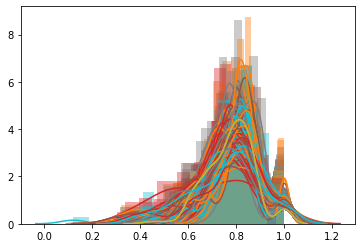

In [22]:
for i in range(100):
    df1 = yb.sample(n=20)
    df2 = y1.sample(n=10)
    print(np.corrcoef(df1))
    dfc2 = np.corrcoef(df2)
    sns.distplot(dfc1)
    sns.distplot(dfc2)

In [46]:
np.corrcoef(df1)[19]

array([0.80651668, 0.76523209, 0.69594447, 0.81709583, 0.77034814,
       0.80109226, 0.81428419, 0.81139747, 0.88672912, 0.83513379,
       0.84982365, 0.84247089, 0.8289649 , 0.84178274, 0.81845574,
       0.70010858, 0.87060999, 0.86495407, 0.81721811, 1.        ])

In [53]:
dfs=[]
for i in range(100):
    dfc = pd.DataFrame(index=range(0,20))
    df1 = yb.sample(n=20)
    df2 = y1.sample(n=20)
    dfs.append(dfc)
    for j in range(20):
        dfc[j]=np.corrcoef(df1)[j] - np.corrcoef(df2)[j]
   

In [55]:
dfs[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.220446e-16,0.124748,2.802136e-02,-1.286097e-02,0.202506,-0.025433,0.003296,0.100179,0.013202,0.121962,-0.074193,-0.047020,0.079634,0.112847,0.190872,0.030316,0.062691,0.014325,0.089343,-0.029938
1,1.247477e-01,0.000000,-3.874577e-02,4.384231e-02,0.100344,0.006235,0.082877,0.051468,-0.075090,-0.048097,-0.119422,-0.004451,-0.085151,0.108021,0.137469,0.010462,0.043596,-0.003565,0.081985,0.236945
2,2.802136e-02,-0.038746,-1.110223e-16,4.857645e-02,0.348929,-0.027157,0.091829,-0.052313,-0.107639,-0.011846,-0.033623,0.093184,0.123861,-0.017794,0.110341,-0.094809,0.104139,0.038251,0.024321,0.140226
3,-1.286097e-02,0.043842,4.857645e-02,-2.220446e-16,0.052392,0.083872,0.001917,-0.010878,-0.001912,0.024176,-0.000885,-0.064205,0.082568,0.013441,0.069973,0.055250,0.019517,-0.023954,-0.013347,0.076581
4,2.025061e-01,0.100344,3.489291e-01,5.239209e-02,0.000000,0.149797,0.341999,-0.023707,-0.037960,0.153908,0.179024,0.026391,0.088627,0.092552,-0.063809,0.105389,0.155227,0.050654,0.154182,0.537274


In [80]:
dfs[3].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.220446e-16,0.179683,-0.012542,0.040212,0.101724,0.155257,0.001141,0.045625,0.110995,0.031992,-0.110735,0.195099,0.083937,0.114450,-0.089381,0.092252,-0.017369,0.124119,-0.070807,-0.034410
1,1.796830e-01,0.000000,0.167823,0.118653,0.364835,0.262143,0.145135,0.337368,0.099687,0.261464,0.025014,0.256887,0.188500,-0.133229,0.063229,0.164732,0.256250,0.184944,0.047521,0.163943
2,-1.254240e-02,0.167823,0.000000,-0.107754,0.099808,0.036799,-0.011195,-0.060073,-0.093803,-0.030847,-0.072711,0.204279,0.181494,-0.079781,-0.024681,0.088638,-0.063913,0.029787,-0.016489,-0.158700
3,4.021191e-02,0.118653,-0.107754,0.000000,0.303646,0.177629,-0.057371,0.117835,0.025063,0.072305,0.014275,0.036758,-0.022482,-0.076267,0.056770,-0.031450,-0.158261,0.213324,0.104391,0.051540
4,1.017241e-01,0.364835,0.099808,0.303646,0.000000,0.257237,0.112149,0.048336,0.114838,0.018995,0.257974,0.412132,0.362429,0.235017,0.212074,0.055925,0.001649,0.114292,0.201280,0.045589


In [89]:
dfp=[]
for i in range(100):
    dfp.append(dfs[i][0][2])

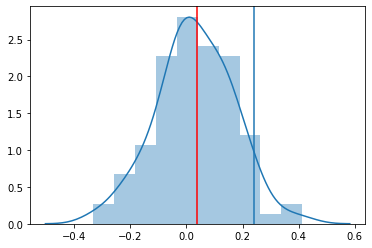

In [116]:
sns.distplot(dfp)
pvalue=np.percentile(dfp, 95)
plt.axvline(x=pvalue)
plt.axvline(x=yb[0][2]-y1[0][2], color = 'r')
plt.show()

In [110]:
dataset = [4, 10, 38, 85, 193]
interquartile_range = iqr(dataset)
interquartile_range

75.0

In [121]:
for i in range(100):
    for j in range(19):
        dfp.append(dfs[i][0][j])
        pvalue=np.percentile(dfp, 95)
        x=yb[0][j]-y1[0][j]
        if x>pvalue:
            print('유의')
        else :
            print('기각 x')

기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x


기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x
기각 x


In [ ]:
'''
add_stat_annotation(그래프명, data = 데이터명, x = "x축 변수", y ="y축 변수",

                                       box_pairs =[("그룹1","그룹2")],

                                       test ='원하는 통계분석',: 원하는 통계분석은 실험자료에 따라 

                                                            t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, 

                                                            Mann-Whitney-ls, Levene, Wilcoxon, Kruskal.를 테스트 할 수 있다. 

                                                            지금 자료에서는 독립적인 두 그룹의 비교이므로 t-test_ind를 사용했다. 

                                       text_format ='star', loc ='inside' or 'outside')
'''

In [ ]:
import pandas as pd
from scipy import stats
from numpy import mean

data1 = [4,6,17,16,8,9]        # 관측치
data2 = [10,10,10,10,10,10]    # 기대치
chis = stats.chisquare(data1, data2)
print("statistic = %.3f, pvalue = %.3f %(chis))  

In [58]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float64
 1   1       20 non-null     float64
 2   2       20 non-null     float64
 3   3       20 non-null     float64
 4   4       20 non-null     float64
 5   5       20 non-null     float64
 6   6       20 non-null     float64
 7   7       20 non-null     float64
 8   8       20 non-null     float64
 9   9       20 non-null     float64
 10  10      20 non-null     float64
 11  11      20 non-null     float64
 12  12      20 non-null     float64
 13  13      20 non-null     float64
 14  14      20 non-null     float64
 15  15      20 non-null     float64
 16  16      20 non-null     float64
 17  17      20 non-null     float64
 18  18      20 non-null     float64
 19  19      20 non-null     float64
dtypes: float64(20)
memory usage: 3.2 KB


In [63]:
def pearsonr_ci(x,y,alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [ ]:
''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

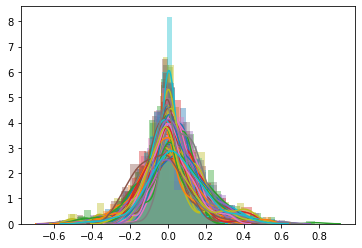

In [74]:
for i in range(100):
    sns.distplot(dfs[i])

In [70]:
trans=[]
for i in range(100):
    trans.append(pearsonr_ci(dfs[i][0], dfs[i][1]))

In [ ]:
r, p = stats.pearsonr(x,y)

In [ ]:
math.atanh()

### Test

In [13]:
ccb=pd.read_excel('base_cc.xls', header = None)
ccb.head()

,0
0,0.073393
1,0.029970
2,0.047474
3,0.011853
4,0.034635


In [14]:
cc1=pd.read_excel('1year_cc.xls', header = None)
cc1.head()

,0
0,0.085110
1,0.057288
2,0.035948
3,0.005069
4,0.045832


In [15]:
cc2=pd.read_excel('2year_cc.xls', header = None)
cc2.head()

,0
0,0.108641
1,0.081165
2,0.055204
3,0.033307
4,0.071435


In [16]:
for i in range(100):
    dfcb = ccb.sample(n=20)
    dfc1 = cc1.sample(n=20)

In [93]:
dfc=dfcb-dfc1
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 2 to 159
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
dtypes: float64(1)
memory usage: 592.0 bytes


In [ ]:
# T - test는 여기서 불가능함
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(dfcb-dfc1, df1+df2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


In [75]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [86]:
from scipy.stats import f_oneway
stat, p = f_oneway(cc1, cc2, ccb)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=4.048, p=0.018
Probably different distributions


In [76]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(cb)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.982, p=0.000
Probably not Gaussian


C:\anaconda3\envs\env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [77]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(cb)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

TypeError: only size-1 arrays can be converted to Python scalars

In [123]:
from scipy import stats
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
print(stats.pearsonr(a, b))
stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])

(0.8660254037844386, 0.011724811003954649)


(-0.7426106572325057, 0.1505558088534455)

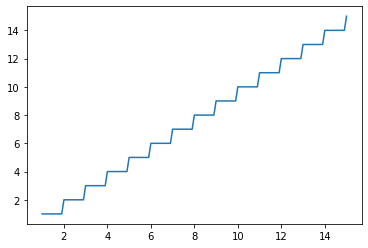

In [66]:
def f(x):
    return np.int(x)
f2 = np.vectorize(f)
x = np.arange(1, 15.1, 0.1)
plt.plot(x, f2(x))
plt.show()